# Emotion Recognition from Facial Expressions

Group 40: Alvaro Menéndez Ros, Juan José Leguineche Gallego, Pablo Herrero Ortiz

## 1. Introduction

This project implements an **Emotion Recognition system** using facial image data to classify human emotions based on visual expressions. The system is designed to detect and interpret emotions such as happiness, sadness, anger, surprise, fear, disgust, and neutrality. The solution follows a complete machine learning pipeline, integrating computer vision and classification techniques to operate on image data from both static datasets and live camera input.

1. **Data acquisition and preparation**: Facial expression data is obtained from the FER2013 dataset, which contains grayscale images labeled with emotion categories. The data is explored, reshaped, and preprocessed to handle class imbalance and prepare it for feature extraction and model training.
2. **Feature engineering**: Meaningful visual features are extracted from the images, exploring different strategies to achieve robust and efficient representations.
3. **Learning methods**: The machine learning models trained and evaluated are Support Vector Machines (SVM), Multi-Layer Perceptrons (MLP), Random Forests and Fuzzy Systems.
4. **Model comparison and analysis**: All approaches are compared, identifying optimal models and features. The best-performing model is deployed in a real-time demo (in an additional python file) that captures video from a laptop camera, detects faces and classifies the displayed emotion.

The notebook is structured to reflect this workflow step by step. While it is divided into more detailed sections, they all contribute to the four stages defined above.  

### 1.1. Imports

To run this notebook, several libraries are needed. The code cell below gathers all required imports. 

**Required Installations:** Python (3.13.5), ...

*Note: Versions in previous list are those used for the execution. While older versions may still work, compatibility cannot be fully guaranteed.*

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


## 2. Data Acquisition and Visualization

This section focuses on obtaining the raw dataset and performing initial visualizations to guide the preprocessing stage.

As mentioned previously, the project uses the FER2013 dataset, which contains grayscale images of facial expressions labeled within seven emotion categories: angry, disgust, fear, happy, sad, surprise, and neutral. The dataset is available as a single .csv file from Kaggle, where each image is represented as a sequence of pixel intensity values alongside its corresponding emotion label.

The dataset contains predefined training, public test, and private test splits, which are preserved for consistent evaluation. After loading, several visualizations are generated to gain an initial understanding of the data distribution and quality. These analyses support informed decisions for preprocessing steps.

In the following cell, the data path (constant) is defined and the dataframe obtained. There is also a short visualization of the first five rows to illustrate the format.

In [16]:
DATA_PATH = "fer2013.csv"

if not os.path.exists(DATA_PATH):
    print("Dataset not found. Please download 'fer2013.csv' from Kaggle and place it in this directory.")

df = pd.read_csv(DATA_PATH)

print("Dataset shape (rows, cols):", df.shape)
df.head()

Dataset shape (rows, cols): (35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


The columns of the dataset can be described as follows:
- emotion: Integer label from 0 to 6 for the seven emotion classes.
- pixels: string of 2304 (48x48) space separated pixel values of the image.
- Usage: Indicates with a string whether the sample belongs to the Training, PublicTest, or PrivateTest split

In the next code cell, sample images are reconstructed from pixel data using NumPy arrays to visualize the appearance of each emotion class.

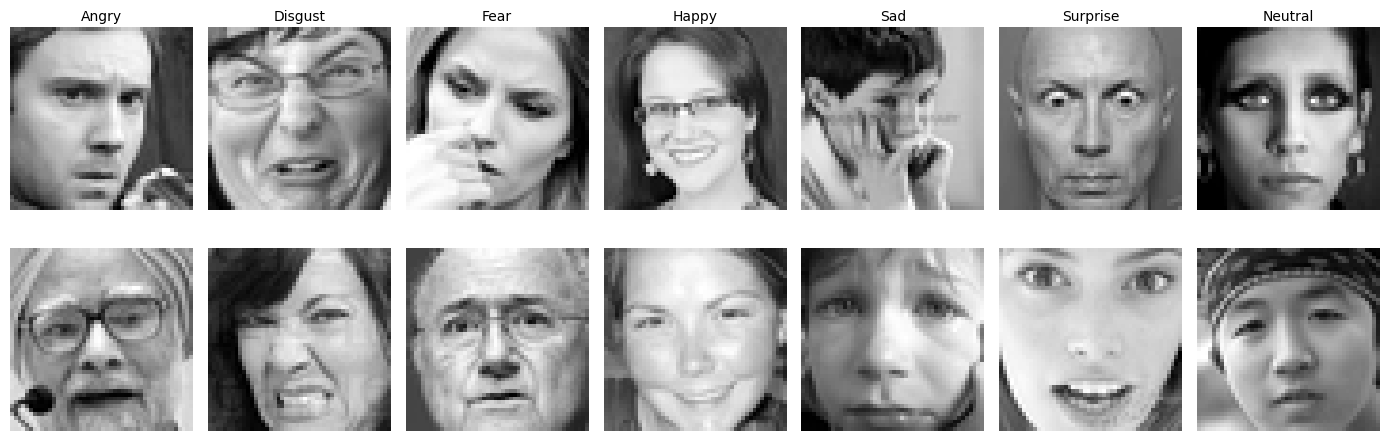

In [17]:
# Map emotions
emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

fig, axes = plt.subplots(2, 7, figsize=(14, 5))

for col, (emotion_id, emotion_name) in enumerate(emotion_labels.items()):
    # Take two samples for each emotion
    samples = df[df['emotion'] == emotion_id].head(2)
    
    for row, (_, sample) in enumerate(samples.iterrows()):
        img = np.fromstring(sample['pixels'], sep=' ').reshape(48, 48)
        axes[row, col].imshow(img, cmap='gray')
        axes[row, col].axis('off')
        
        if row == 0:
            axes[row, col].set_title(emotion_name, fontsize=10, pad=5)

plt.tight_layout()
plt.show()